In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from rv_study.rv_utils import *
from scipy.spatial import ConvexHull, convex_hull_plot_2d

Using TensorFlow backend.


regime classifier
Loading classifier
Train accuracy: 0.9887387387387387

Regression model generation_rate2
Loading Regressor
R square (R^2) for Train:                 0.987384

Regression model droplet_size2
Loading Regressor
R square (R^2) for Train:                 0.983142

Regression model generation_rate1
Loading Regressor
R square (R^2) for Train:                 0.965872

Regression model droplet_size1
Loading Regressor
R square (R^2) for Train:                 0.953238



In [84]:
# Load Dataset and sort
chips = pd.read_csv("20210125_designspace_sweep3.csv")
all_results = pd.read_csv("20210125_complete_sweep3.csv")
chips = chips.sort_values("size_score")

In [89]:
chips = chips.sort_values("rate_score")

In [91]:
chips

,Unnamed: 0,aspect_ratio,expansion_ratio,normalized_oil_inlet,normalized_orifice_length,normalized_water_inlet,orifice_size,score,size_score,rate_score
22461,22461,3.0,6.0,3.0,1.5,3.5,150,2075.400091,190.562439,15.247167
28091,28091,3.0,6.0,3.5,1.5,3.5,175,2100.487295,177.324509,15.674414
21337,21337,2.5,6.0,3.0,2.0,3.5,150,2974.155179,211.076233,16.548920
21336,21336,2.5,6.0,3.0,1.5,3.5,150,2722.449257,184.208710,17.769583
21341,21341,2.5,6.0,3.5,1.5,3.5,150,2828.065963,182.930481,18.800217
16836,16836,3.0,6.0,3.0,1.5,3.5,125,2821.051715,188.440323,19.943527
26962,26962,2.5,6.0,3.0,2.0,3.5,175,3003.659202,206.037338,21.137154
28061,28061,3.0,6.0,3.0,1.5,3.0,175,3371.432596,202.594345,21.403870
26837,26837,2.5,5.5,3.0,2.0,3.5,175,3413.972644,195.278229,21.440912
22462,22462,3.0,6.0,3.0,2.0,3.5,150,3777.902211,212.987366,21.723183


In [87]:
chips.iloc[0,:].to_dict()

{'Unnamed: 0': 2295.0,
 'aspect_ratio': 2.0,
 'expansion_ratio': 2.0,
 'normalized_oil_inlet': 4.0,
 'normalized_orifice_length': 1.0,
 'normalized_water_inlet': 2.5,
 'orifice_size': 75.0,
 'score': 19180.76882376539,
 'size_score': 40.74329376220703,
 'rate_score': 640.9322509765625}

LOWEST 2075.400091
HIGHEST 72873.543893


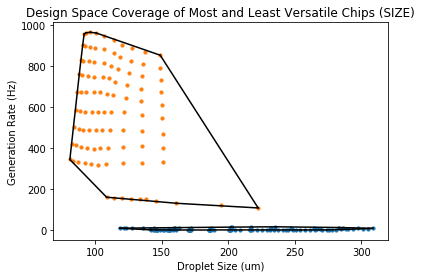

In [90]:
highest_results = all_results.loc[all_results["chip_num"]==chips.iloc[-1, 0], :]
lowest_results = all_results.loc[all_results["chip_num"]==chips.iloc[0, 0], :]

print("LOWEST %f" % chips.head(1)["score"])
print("HIGHEST %f" % chips.tail(1)["score"])


for x in [lowest_results, highest_results]:
    sizes = x["size"].tolist()
    rates = x["rate"].tolist()
    points = np.array([[sizes[i], rates[i]] for i in range(len(sizes))])
    hull = ConvexHull(points)
    plt.scatter(points[:,0], points[:,1], s=10)
    for simplex in hull.simplices:
        plt.plot(points[simplex, 0], points[simplex, 1], 'k-')
        
plt.title("Design Space Coverage of Most and Least Versatile Chips (SIZE)")
plt.xlabel("Droplet Size (um)")
plt.ylabel("Generation Rate (Hz)")
plt.savefig("VersatilityExtremes_Compare.png")

*Main Effect Analysis*

In [52]:
'''STEPS:
1) Find mean of all results.
2) Across each collection of values used (have code from before). Take mean of each at every checkpoint 
3) Plot out main effect plots for each
'''

'STEPS:\n1) Find mean of all results.\n2) Across each collection of values used (have code from before). Take mean of each at every checkpoint \n3) Plot out main effect plots for each\n'

In [53]:
mean_size = all_results["size"].mean()
mean_rate = all_results["rate"].mean()


In [54]:
size_normalized = (all_results["size"]/all_results["orifice_size"])
mean_size_normalized = size_normalized.mean()

In [55]:
mean_score = chips["score"].mean()
mean_size_score = chips["size_score"].mean()
mean_rate_score = chips["rate_score"].mean()

In [63]:
meff_cols = ['aspect_ratio', 'expansion_ratio',
       'normalized_oil_inlet', 'normalized_orifice_length',
       'normalized_water_inlet', 'orifice_size']#, "capillary_number", "flow_rate_ratio"]

meff_vals = {}
for col in meff_cols:
    sweep_range = all_results[col].unique()
    size_score_avgs = []
    rate_score_avgs = []
    score_avgs = []
    for val in sweep_range:
        #size_avgs.append(size_normalized[all_results[col] == val].mean())
        size_score_avgs.append(chips.loc[chips[col] == val, "size_score"].mean())
        rate_score_avgs.append(chips.loc[chips[col] == val, "rate_score"].mean())
        score_avgs.append(chips.loc[chips[col] == val, "score"].mean())
    #meff_vals[col] = {"range": sweep_range, "size_averages": size_avgs, "rate_averages": rate_avgs}
    meff_vals[col] = {"range": sweep_range, "size_score_avgs": size_score_avgs, "rate_score_avgs": rate_score_avgs, "score_avgs": score_avgs}
        

In [65]:
meff_vals

{'aspect_ratio': {'range': array([1. , 1.5, 2. , 2.5, 3. ]),
  'size_score_avgs': [138.98407729356555,
   143.74890611300998,
   149.80219841512044,
   157.20343153483074,
   163.66608869086372],
  'rate_score_avgs': [371.34175215386284,
   328.17161756863067,
   284.04330608350966,
   255.67619523383246,
   239.5596335498386],
  'score_avgs': [31713.14399387023,
   30169.45255437426,
   28052.249241723617,
   27012.477242371722,
   26604.05758644851]},
 'expansion_ratio': {'range': array([2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
  'size_score_avgs': [127.50105407104492,
   132.56954832885742,
   136.9220623449707,
   140.8232855395508,
   145.4463701904297,
   153.49829272705077,
   163.40652283203124,
   173.33877142578126,
   182.62255622558592],
  'rate_score_avgs': [475.6775374658203,
   411.6260938305664,
   350.9938680004883,
   298.05078348388673,
   256.58394732421874,
   229.37973619384766,
   216.8087347570801,
   212.05713664733887,
   210.64867055816651],
  'score_av

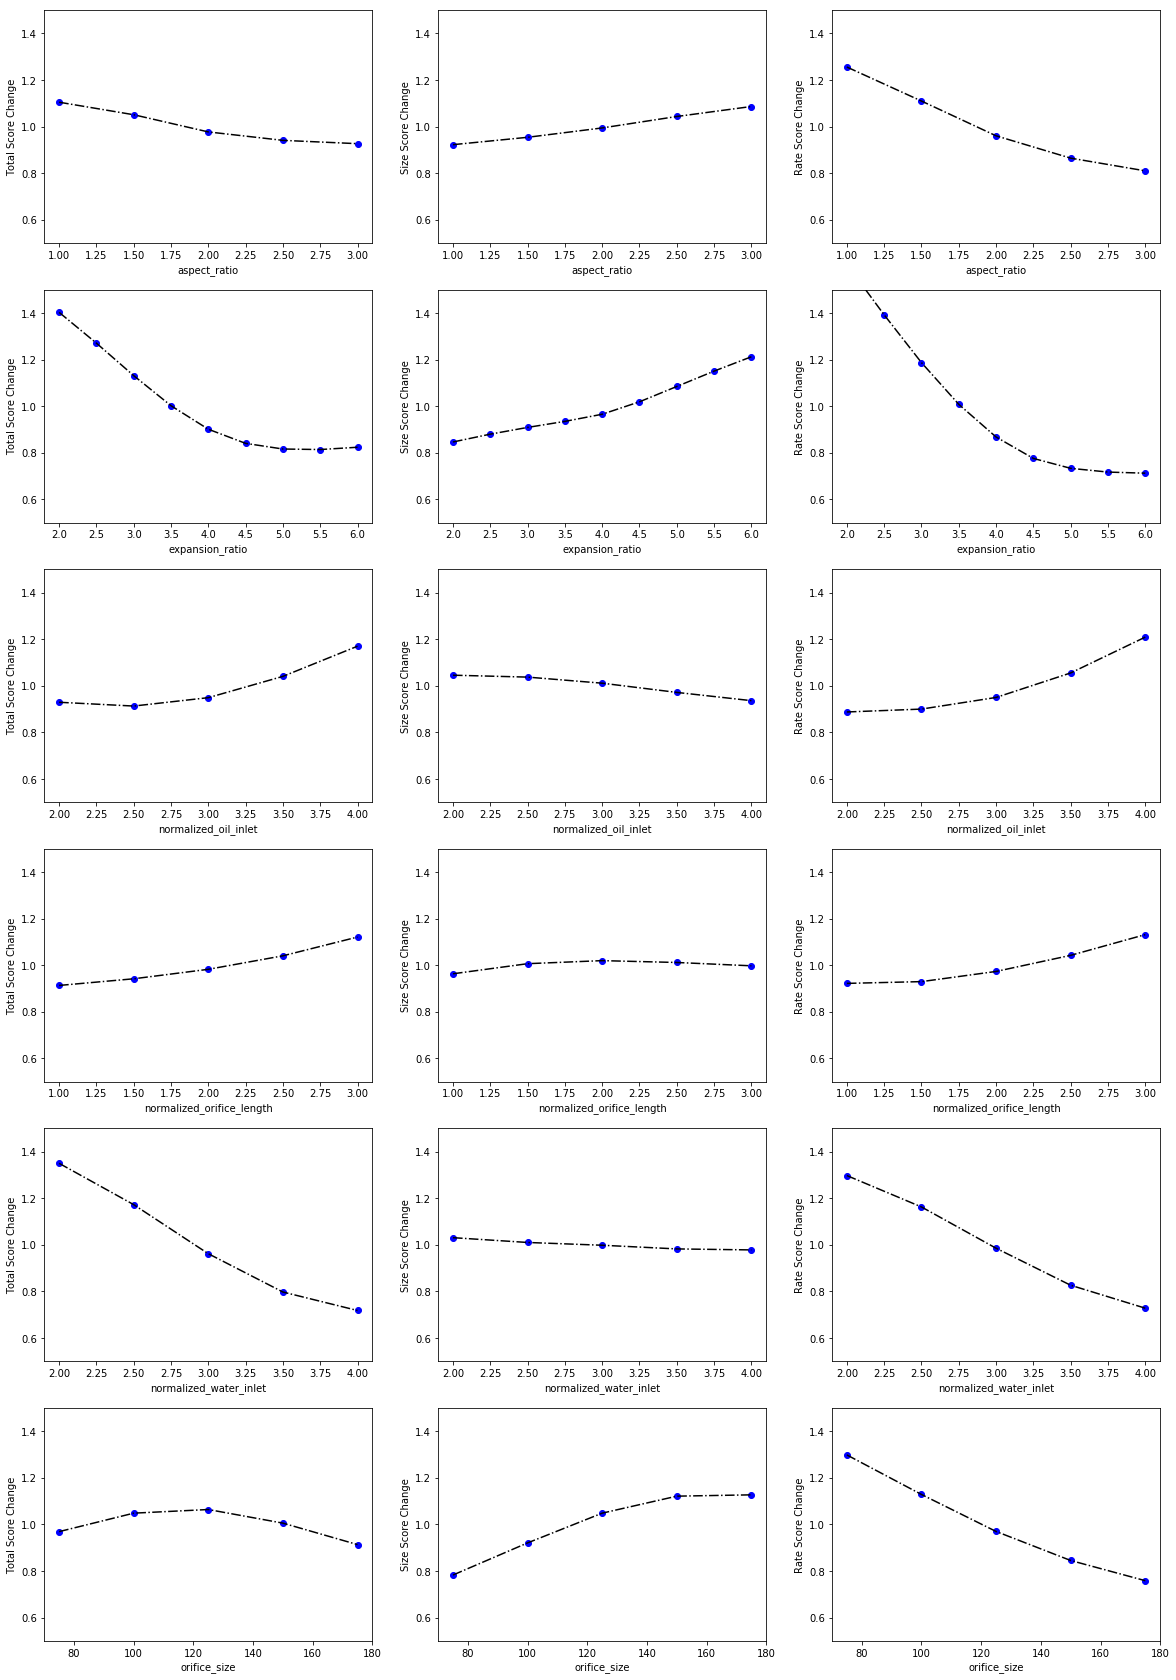

In [72]:
fig, axs = plt.subplots(6,3, figsize=[20,30])
for i, param in enumerate(meff_vals.keys()):
    param_range = meff_vals[param]["range"]
    score_normed =  meff_vals[param]["score_avgs"]/mean_score
    size_score_normed = meff_vals[param]["size_score_avgs"]/mean_size_score
    rate_score_normed = meff_vals[param]["rate_score_avgs"]/mean_rate_score
    
    axs[i][0].plot(param_range, score_normed, "bo")
    axs[i][0].plot(param_range, score_normed, "k-.")
    
    axs[i][0].set_xlabel(param)
    axs[i][0].set_ylabel("Total Score Change")
    axs[i][0].set_ylim([0.5, 1.5])
        
    axs[i][1].plot(param_range, size_score_normed, "bo")
    axs[i][1].plot(param_range, size_score_normed, "k-.")
    
    axs[i][1].set_xlabel(param)
    axs[i][1].set_ylabel("Size Score Change")
    axs[i][1].set_ylim([0.5, 1.5])
    
    axs[i][2].plot(param_range, rate_score_normed, "bo")
    axs[i][2].plot(param_range, rate_score_normed, "k-.")

    axs[i][2].set_xlabel(param)
    axs[i][2].set_ylabel("Rate Score Change")
    axs[i][2].set_ylim([0.5, 1.5])
    
plt.savefig('MainEffectAnalysis_versatility_values.png')

In [87]:
axs

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014B0241E668>,
      dtype=object)